<a href="https://colab.research.google.com/github/txxxmvs/Mineria/blob/main/mineria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tratamiento de los Datos

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv("aus.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


Se utiliza para calcular la cantidad de los valores faltantes(Valor nulos o NaN) en cada columnda del "DF"

In [ ]:
df.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

Filtra el DataFrame 'df' para seleccionar solo las filas donde el valor de la columna "Location" sea igual a "Melbourne"

In [ ]:
df_melbourne = df[df['Location'] == 'Melbourne']

Realiza el rellena de valores faltantes en el DataFrame 'df_melbourne' utilizando el metro 'fillna()'
Ademas, se estabke el parametro, lo que significa que el DataFrame 'df_melbourne' se modificara directamente en su lugar, en lugar de crear un nuevo DataFrame

In [ ]:
df_melbourne_filled = df_melbourne.fillna(df_melbourne.mode().iloc[0], inplace=True)

Se ulitiza para contar la cantidad de los valores faltantes en cada columna de lDataFrame

In [ ]:
df_melbourne.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [ ]:
df_melbourne.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
65745,2008-07-01,Melbourne,9.5,15.4,2.0,2.8,7.0,W,63.0,W,...,38.0,1006.8,1010.3,1.0,7.0,11.0,14.6,Yes,0.6,No
65746,2008-07-02,Melbourne,11.0,14.5,0.6,5.2,4.0,W,63.0,W,...,52.0,1013.4,1016.2,7.0,4.0,11.8,13.7,No,1.4,Yes
65747,2008-07-03,Melbourne,8.4,14.1,1.4,2.0,0.8,W,39.0,W,...,58.0,1024.8,1024.3,7.0,7.0,10.6,13.9,Yes,0.6,No
65748,2008-07-04,Melbourne,9.1,14.5,0.6,1.8,4.2,E,19.0,NNW,...,49.0,1030.2,1029.0,7.0,6.0,10.2,13.1,No,0.0,No
65749,2008-07-05,Melbourne,4.3,15.5,0.0,0.8,8.4,N,52.0,N,...,52.0,1028.9,1024.9,2.0,5.0,5.5,14.6,No,0.0,No


Se reemplazan los valores de la columnda 'Raintoday' en el dataframe 'df_melbourne'. ademas, se utiliza el metro replace para realizar la sustitución, los valores 'yes' se reemplazan por 1 y los valores 'No' se reemplazan por 0.
Estos reemplazos son realizados para convertir las variables categoricas'Yes' y 'No ' en variables numericas. Esto es util para aplicar algoritmos de aprendizaje automatico que requiere variables numericas en lugar de categorias.

In [ ]:
df_melbourne['RainToday'] = df_melbourne['RainToday'].replace({'Yes': 1, 'No': 0})
df_melbourne['RainTomorrow'] = df_melbourne['RainTomorrow'].replace({'Yes': 1, 'No': 0})

In [ ]:
df_melbourne.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
65745,2008-07-01,Melbourne,9.5,15.4,2.0,2.8,7.0,W,63.0,W,...,38.0,1006.8,1010.3,1.0,7.0,11.0,14.6,1,0.6,0
65746,2008-07-02,Melbourne,11.0,14.5,0.6,5.2,4.0,W,63.0,W,...,52.0,1013.4,1016.2,7.0,4.0,11.8,13.7,0,1.4,1
65747,2008-07-03,Melbourne,8.4,14.1,1.4,2.0,0.8,W,39.0,W,...,58.0,1024.8,1024.3,7.0,7.0,10.6,13.9,1,0.6,0
65748,2008-07-04,Melbourne,9.1,14.5,0.6,1.8,4.2,E,19.0,NNW,...,49.0,1030.2,1029.0,7.0,6.0,10.2,13.1,0,0.0,0
65749,2008-07-05,Melbourne,4.3,15.5,0.0,0.8,8.4,N,52.0,N,...,52.0,1028.9,1024.9,2.0,5.0,5.5,14.6,0,0.0,0


le indicamos a Pandas que deseamos eliminar una columna en lugar de una fila. Esto significa que la columna 'Date' se eliminará de forma permanente del DataFrame y no estará disponible para futuros análisis o cálculos.

In [ ]:
df_melbourne = df_melbourne.drop('Date', axis=1)

 elimina las columnas 'Evaporation' y 'RISK_MM' del DataFrame df_melbourne.

In [ ]:
df_melbourne_1 = df_melbourne.drop(['Evaporation', 'RISK_MM'], axis=1)

En el código proporcionado, se define una lista llamada columnas_a_eliminar que contiene los nombres de las columnas que se desean eliminar del DataFrame df_melbourne_1.

In [ ]:
columnas_a_eliminar = ['WindGustDir', 'WindDir9am', 'WindDir3pm','Location']
df_melbourne_2 = df_melbourne_1.drop(columnas_a_eliminar, axis=1)

El código realiza la normalización de las características numéricas del DataFrame df_melbourne_2 utilizando la técnica de escala estándar con la ayuda de StandardScaler. El DataFrame resultante, df_normalized, contendrá las mismas columnas que df_numerical, pero con los valores normalizados.

In [ ]:
from sklearn.preprocessing import StandardScaler

df_numerical = df_melbourne_2.select_dtypes(include=[np.number])

scaler = StandardScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns)

el código df_normalized.describe().T devuelve un resumen estadístico de las características normalizadas en el DataFrame df_normalized, donde cada columna representa una característica y las filas representan las estadísticas descriptivas.

In [ ]:
df_normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,2435.0,1.167216e-17,1.000205,-2.430621,-0.729715,-0.091875,0.664083,3.971400
MaxTemp,2435.0,-5.719358e-16,1.000205,-1.806494,-0.784419,-0.207441,0.567358,4.210560
Rainfall,2435.0,-2.626236e-17,1.000205,-0.342946,-0.342946,-0.342946,-0.184758,15.910846
Sunshine,2435.0,-1.371479e-16,1.000205,-1.649097,-0.832601,0.060441,0.800390,1.897556
WindGustSpeed,2435.0,-1.167216e-17,1.000205,-2.113083,-0.759883,-0.144793,0.654825,3.607261
WindSpeed9am,2435.0,2.334432e-17,1.000205,-1.618237,-0.853109,-0.172996,0.592131,3.907683
WindSpeed3pm,2435.0,1.517381e-16,1.000205,-2.145021,-0.671643,-0.180517,0.605285,5.320095
Humidity9am,2435.0,-2.567875e-16,1.000205,-3.622007,-0.633169,0.046113,0.725395,2.219814
Humidity3pm,2435.0,-8.170512e-17,1.000205,-2.808266,-0.619365,-0.056504,0.631436,3.070497
Pressure9am,2435.0,-1.190998e-14,1.000205,-3.681609,-0.648963,0.034180,0.679016,2.715678


In [ ]:
df_normalized.head(5)

,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,-0.540726,-0.899815,0.052524,0.136987,1.085389,1.527287,1.292862,-0.497312,-0.806985,-1.395952,-0.726650,-1.937778,0.630771,-0.756571,-0.822529,1.788372,-0.594584
1,-0.186370,-1.048180,-0.224305,-0.628477,1.085389,0.932188,1.292862,-0.089743,0.068576,-0.553196,0.046085,0.612297,-0.748804,-0.590012,-0.978704,-0.559168,1.681849
2,-0.800586,-1.114121,-0.066117,-1.444973,-0.390829,-0.172996,0.212384,0.317826,0.443816,0.902475,1.106958,0.612297,0.630771,-0.839851,-0.943999,1.788372,-0.594584
3,-0.635220,-1.048180,-0.224305,-0.577446,-1.621010,-0.853109,-1.457444,1.336748,-0.119044,1.592003,1.722526,0.612297,0.170912,-0.923130,-1.082821,-0.559168,-0.594584
4,-1.769158,-0.883330,-0.342946,0.494204,0.408789,0.422103,0.801735,0.929179,0.068576,1.426005,1.185541,-1.512765,-0.288946,-1.901667,-0.822529,-0.559168,-0.594584


In [ ]:
df_melbourne_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2435 entries, 65745 to 68179
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        2435 non-null   float64
 1   MaxTemp        2435 non-null   float64
 2   Rainfall       2435 non-null   float64
 3   Sunshine       2435 non-null   float64
 4   WindGustSpeed  2435 non-null   float64
 5   WindSpeed9am   2435 non-null   float64
 6   WindSpeed3pm   2435 non-null   float64
 7   Humidity9am    2435 non-null   float64
 8   Humidity3pm    2435 non-null   float64
 9   Pressure9am    2435 non-null   float64
 10  Pressure3pm    2435 non-null   float64
 11  Cloud9am       2435 non-null   float64
 12  Cloud3pm       2435 non-null   float64
 13  Temp9am        2435 non-null   float64
 14  Temp3pm        2435 non-null   float64
 15  RainToday      2435 non-null   int64  
 16  RainTomorrow   2435 non-null   int64  
dtypes: float64(15), int64(2)
memory usage: 342.4 KB

El código genera un mapa de calor que muestra la matriz de correlación entre las variables numéricas del DataFrame df_melbourne_2. Esto ayuda a identificar las relaciones de correlación entre las variables y proporciona información sobre la dependencia lineal entre ellas.

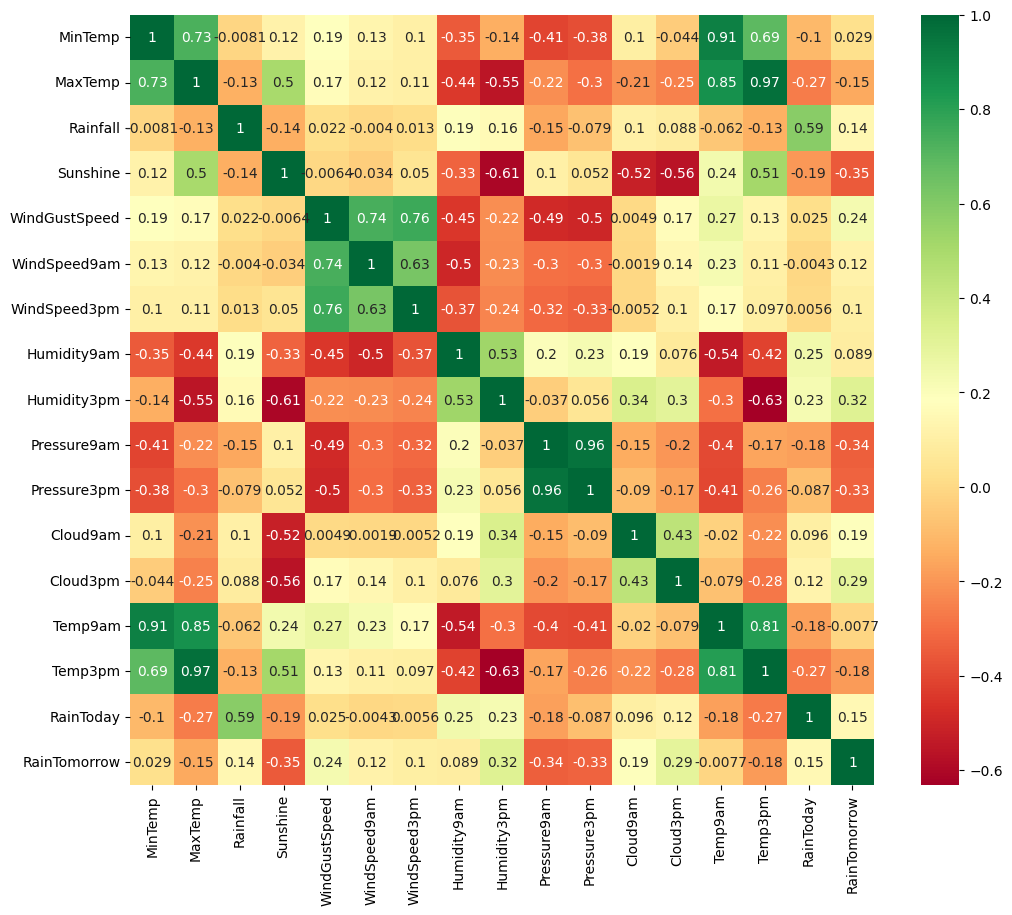

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_numeric = df_melbourne_2


correlation_matrix = df_numeric.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')

# Mostrar el mapa de calor
plt.show()

# Modelos de Clasificacion

el código entrena un modelo de clasificación de árbol de decisión utilizando el conjunto de datos df_melbourne_2 codificado. Luego, se evalúa el rendimiento del modelo utilizando la precisión y exactitud. Por último, se muestra el árbol de decisión que representa las reglas de clasificación aprendidas por el modelo.

Precisión del modelo: 0.7351129363449692
Accuracy del modelo: 0.7351129363449692


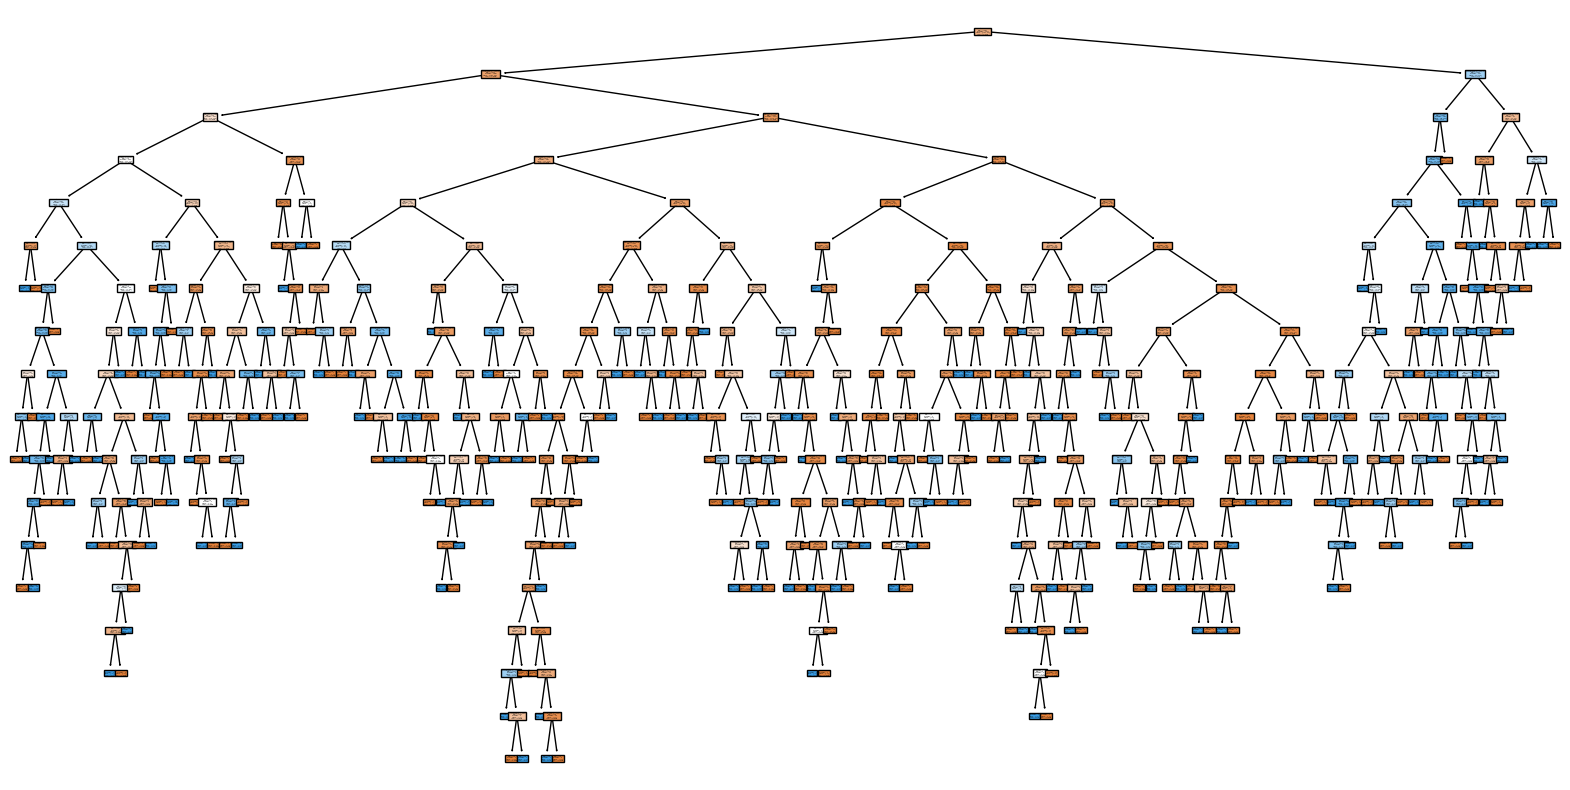

In [ ]:
#clasificacion
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

df_encoded = pd.get_dummies(df_melbourne_2)

X = df_encoded.drop(["RainTomorrow"], axis=1)
y = df_encoded["RainTomorrow"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

precision = model.score(X_test, y_test)
accuracy = model.score(X_test, y_test)
print('Precisión del modelo:', precision)
print('Accuracy del modelo:', accuracy)

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=["No Rain", "Rain"], filled=True)
plt.show()

El código utiliza los métodos get_depth() y get_n_leaves() del modelo de clasificación de árbol de decisión para obtener información sobre la estructura del árbol
Muestra la profundidad del árbol y el número de nodos terminales en la salida. Estas métricas proporcionan información útil sobre la estructura y complejidad del árbol de decisión entrenado.

In [ ]:
depth = model.get_depth()
n_leaves = model.get_n_leaves()
print('Profundidad del árbol:', depth)
print('Número de nodos terminales:', n_leaves)

Profundidad del árbol: 17
Número de nodos terminales: 285


In [ ]:
df_melbourne_2.head(5)

,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


Esto instalará la última versión disponible de TensorFlow en tu entorno.

In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



El gráfico muestra la precisión del modelo de red neuronal durante el entrenamiento. En el eje horizontal se representan las épocas, que corresponden a las iteraciones del algoritmo de entrenamiento. En el eje vertical se muestra la precisión del modelo, es decir, la proporción de predicciones correctas sobre el total de ejemplos de entrenamiento
En general, se busca que ambas líneas aumenten y se estabilicen en un nivel alto de precisión, lo que indica que el modelo es capaz de hacer buenas predicciones tanto en los datos de entrenamiento como en los datos no vistos previamente (validación).

Epoch 1/10
49/49 [==============================] - 2s 5ms/step - loss: 1.2528 - accuracy: 0.7548 - val_loss: 0.8755 - val_accuracy: 0.7846
Epoch 2/10
49/49 [==============================] - 0s 2ms/step - loss: 0.9293 - accuracy: 0.7811 - val_loss: 1.0867 - val_accuracy: 0.7410
Epoch 3/10
49/49 [==============================] - 0s 2ms/step - loss: 0.7246 - accuracy: 0.8017 - val_loss: 0.7302 - val_accuracy: 0.7487
Epoch 4/10
49/49 [==============================] - 0s 2ms/step - loss: 0.6087 - accuracy: 0.7953 - val_loss: 0.6724 - val_accuracy: 0.7667
Epoch 5/10
49/49 [==============================] - 0s 2ms/step - loss: 0.5802 - accuracy: 0.7895 - val_loss: 0.7831 - val_accuracy: 0.6821
Epoch 6/10
49/49 [==============================] - 0s 2ms/step - loss: 0.6060 - accuracy: 0.7920 - val_loss: 0.6443 - val_accuracy: 0.7641
Epoch 7/10
49/49 [==============================] - 0s 2ms/step - loss: 0.6602 - accuracy: 0.7940 - val_loss: 0.7220 - val_accuracy: 0.7667
Epoch 8/10
49/49 [==

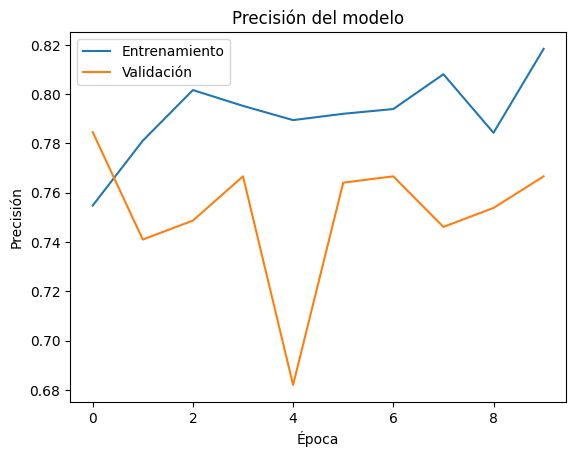

In [ ]:
#clasifiacion
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

# Preprocesamiento de los datos
df_encoded = pd.get_dummies(df_melbourne_2)
X = df_encoded.drop(["RainTomorrow"], axis=1)
y = df_encoded["RainTomorrow"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creación del modelo de red neuronal
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(keras.layers.Dense(64, activation='tanh'))
model.add(keras.layers.Dense(1, activation='leaky_relu'))

# Compilación del modelo
model.compile(optimizer='RMSProp', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluación del modelo en datos de prueba
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Precisión del modelo:', accuracy)

# Visualización de la precisión y la pérdida durante el entrenamiento
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()


Aclaración de error cuadratico.

In [ ]:
#El error cuadrático medio (MSE, por sus siglas en inglés) es una métrica utilizada en problemas de regresión para evaluar qué tan cerca están las predicciones
#del modelo de los valores reales. Representa el promedio de los errores al cuadrado entre las predicciones y los valores reales. El MSE se calcula mediante la fórmula:
#MSE = (1/n) * Σ(y_pred - y_real)^2 Donde: n es el número de muestras en el conjunto de datos de prueba. y_pred son las predicciones del modelo para las muestras de prueba.
#y_real son los valores reales correspondientes a las muestras de prueba. El MSE se expresa en las unidades al cuadrado de la variable objetivo. Por lo tanto, cuanto más pequeño
#sea el valor del MSE, mejor será el ajuste del modelo a los datos. En resumen, el MSE es una medida de la calidad de ajuste del modelo en problemas de regresión, donde se busca
#minimizar este valor para obtener predicciones más precisas. User este valor es  0.13895523552472333 es bueno ChatGPT El valor del error cuadrático medio (MSE) de 0.1389 no puede
#ser juzgado como "bueno" o "malo" en sí mismo sin un contexto adicional. La interpretación del MSE depende del dominio del problema y de la escala de los datos. Generalmente,
#se considera que un MSE más bajo indica un mejor ajuste del modelo a los datos, ya que implica que las predicciones están más cerca de los valores reales. Sin embargo,
#la evaluación de si un valor de MSE es bueno o no depende de la naturaleza del problema y del rango de los valores objetivo. Para tener una mejor idea de la calidad del modelo,
#es recomendable comparar el MSE obtenido con otros modelos o con un punto de referencia para determinar si es aceptable en el contexto específico. Además, también es importante
#considerar otras métricas de evaluación, como el coeficiente de determinación (R-cuadrado) o realizar un análisis más profundo del rendimiento y la interpretación del modelo en
#relación con el problema que estás abordando.

El gráfico muestra la precisión del modelo de red neuronal durante el entrenamiento utilizando solo las variables 'WindGustSpeed', 'Humidity3pm', 'Pressure9am' y 'Temp9am' para predecir la variable 'RainTomorrow'. El eje horizontal representa las épocas de entrenamiento y el eje vertical muestra la precisión del modelo.
Este gráfico proporciona una visualización de cómo se está desempeñando el modelo durante el entrenamiento y puede ayudar a identificar posibles problemas o mejoras en el modelo.

Epoch 1/10
49/49 [==============================] - 1s 13ms/step - loss: 0.4997 - accuracy: 0.7792 - val_loss: 0.4863 - val_accuracy: 0.7821
Epoch 2/10
49/49 [==============================] - 0s 2ms/step - loss: 0.4452 - accuracy: 0.8055 - val_loss: 0.4885 - val_accuracy: 0.7795
Epoch 3/10
49/49 [==============================] - 0s 2ms/step - loss: 0.4388 - accuracy: 0.8119 - val_loss: 0.4902 - val_accuracy: 0.7846
Epoch 4/10
49/49 [==============================] - 0s 2ms/step - loss: 0.4370 - accuracy: 0.8081 - val_loss: 0.4930 - val_accuracy: 0.7744
Epoch 5/10
49/49 [==============================] - 0s 2ms/step - loss: 0.4346 - accuracy: 0.8119 - val_loss: 0.4898 - val_accuracy: 0.7846
Epoch 6/10
49/49 [==============================] - 0s 2ms/step - loss: 0.4339 - accuracy: 0.8081 - val_loss: 0.4925 - val_accuracy: 0.7795
Epoch 7/10
49/49 [==============================] - 0s 2ms/step - loss: 0.4323 - accuracy: 0.8158 - val_loss: 0.4931 - val_accuracy: 0.7821
Epoch 8/10
49/49 [=

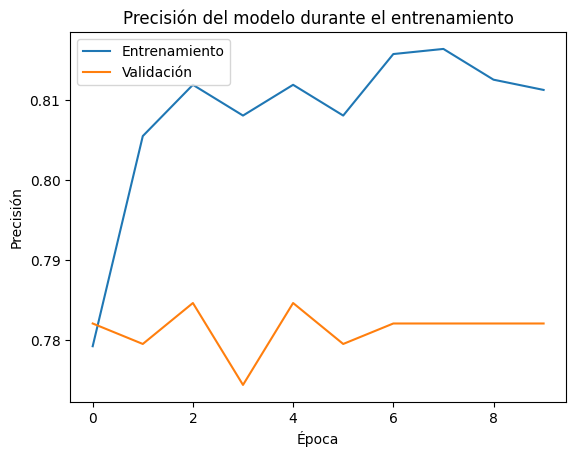

In [ ]:
#entramiendo solo para las variables a predecir
# Preprocesamiento de los datos
X = df_melbourne_2[['WindGustSpeed', 'Humidity3pm', 'Pressure9am', 'Temp9am']]
y = df_melbourne_2['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creación del modelo de red neuronal
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(keras.layers.Dense(64, activation='tanh'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Compilación del modelo
model.compile(optimizer='RMSProp', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluación del modelo en datos de prueba
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Precisión del modelo:', accuracy)

# Visualización de la precisión durante el entrenamiento
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()


este código entrena un modelo Naive Bayes utilizando los datos de entrenamiento y luego evalúa su precisión en el conjunto de prueba. La precisión del modelo se imprime al final.
-Importación de las bibliotecas necesarias
-Preprocesamiento de los datos
-Separación de los datos en conjuntos de entrenamiento y prueba utilizando la función
-Creación y entrenamiento del modelo
-Realización de predicciones y cálculo de la precisión
-Impresión de la precisión del modelo.

In [ ]:
#Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

df_encoded = pd.get_dummies(df_melbourne_2)

X = df_encoded.drop(["RainTomorrow"], axis=1)
y = df_encoded["RainTomorrow"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print('Precisión del modelo:', accuracy)


Precisión del modelo: 0.7741273100616016


#Regresion



El código utiliza el algoritmo de Árbol de Decisión para realizar una regresión. A continuación, se muestra una descripción de lo que hace cada línea de código
entrena un modelo de regresión basado en Árbol de Decisión utilizando los datos de entrenamiento y luego realiza predicciones en el conjunto de prueba. El error cuadrático medio del modelo se calcula e implime en la variable y_pred.

In [ ]:
#Arbol de decision regresion
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df_encoded = pd.get_dummies(df_melbourne_2)

X = df_encoded.drop('RainTomorrow', axis=1)
y = df_encoded['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regression_tree = DecisionTreeRegressor()

regression_tree.fit(X_train, y_train)

y_pred = regression_tree.predict(X_test)

Este código realiza predicciones con el modelo de regresión de árbol de decisión en el conjunto de prueba y muestra la precisión del modelo en los conjuntos de entrenamiento y validación.
El coeficiente de determinación R^2 es una medida de qué tan bien el modelo se ajusta a los datos, y puede tomar valores entre 0 y 1. Un valor de 1 indica un ajuste perfecto del modelo a los datos, mientras que valores cercanos a 0 indican un ajuste deficiente.

In [ ]:
y_pred = regression_tree.predict(X_test)

print('Precisión del modelo (en entrenamiento):', regression_tree.score(X_train, y_train))
print('Precisión del modelo (en validación):', regression_tree.score(X_test, y_test))

Precisión del modelo (en entrenamiento): 1.0
Precisión del modelo (en validación): -0.4025161318262527


Esta visualización muestra el árbol de decisión entrenado, donde cada nodo representa una división en una característica y cada hoja representa una predicción. Los nodos están coloreados según la clase predominante en ese nodo. La estructura del árbol y las divisiones se basan en las características utilizadas en el modelo.

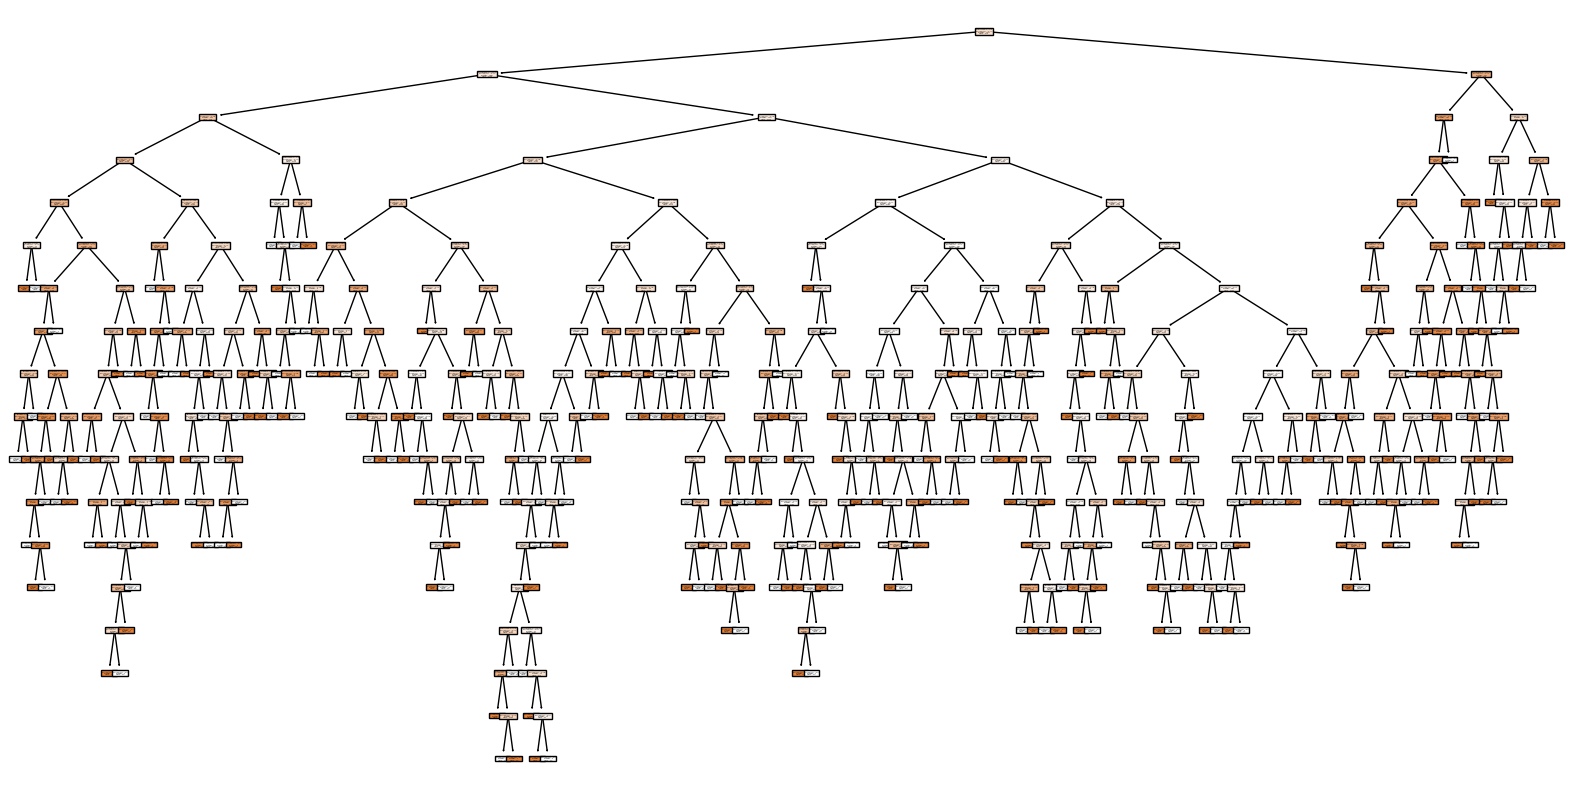

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(regression_tree, feature_names=X.columns, filled=True, ax=ax)
plt.show()

El código que has proporcionado utiliza los métodos get_depth() y get_n_leaves() del modelo de árbol de decisión entrenado (regression_tree) para obtener información sobre la estructura del árbol. Aquí está el significado de cada línea de código
Estos valores proporcionan información sobre la complejidad y el tamaño del árbol de decisión entrenado. Una mayor profundidad puede indicar un modelo más complejo, mientras que un mayor número de nodos terminales puede indicar una partición más fina de las instancias de datos.

In [ ]:
depth = regression_tree.get_depth()
print("Profundidad del árbol:", depth)

n_leaves = regression_tree.get_n_leaves()
print("Número de nodos terminales:", n_leaves)

Profundidad del árbol: 17
Número de nodos terminales: 283


Este codigo utiliza el modelo de regresión lineal (LinearRegression) para realizar predicciones y evaluar el rendimiento del modelo utilizando métricas de regresión. Aquí está el significado de cada línea de código.
Este código te permite evaluar el rendimiento de un modelo de regresión lineal en la predicción de la variable objetivo utilizando las métricas de error cuadrático medio y coeficiente de determinación. Además, proporciona una visualización de las predicciones en comparación con los valores reales.

Error cuadrático medio: 0.13895523552472333
Coeficiente de determinación (R-cuadrado): 0.28639135909741664


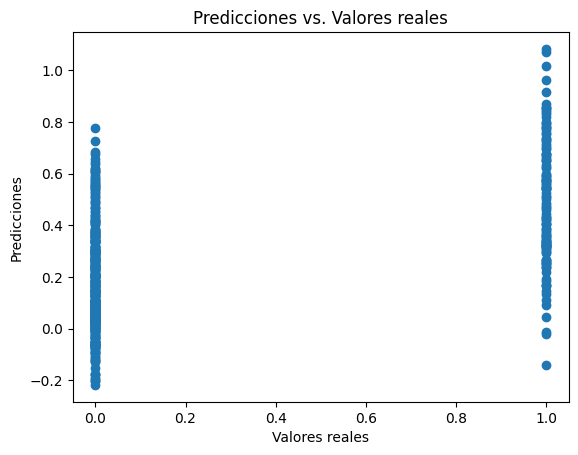

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df_encoded = pd.get_dummies(df_melbourne_2)

X = df_encoded.drop(["RainTomorrow"], axis=1)
y = df_encoded["RainTomorrow"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

# Evaluación del modelo utilizando métricas de regresión (por ejemplo, error cuadrático medio, coeficiente de determinación, etc.)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print('Error cuadrático medio:', mse)
print('Coeficiente de determinación (R-cuadrado):', r2)

plt.scatter(y_test, predictions)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores reales')
plt.show()

# Prediccion de lluvia (Melbourne)


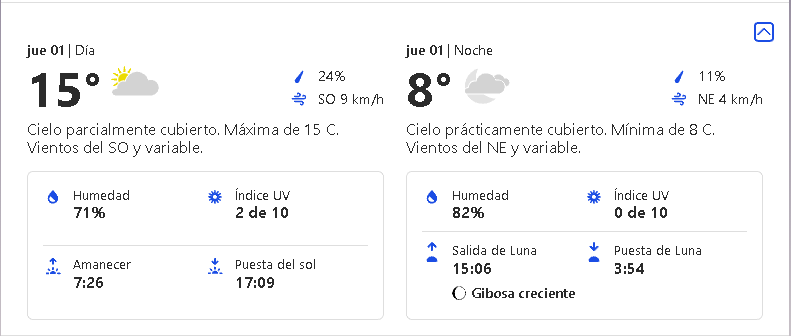


Este código permite al usuario ingresar los valores de las características y obtener la probabilidad estimada de lluvia utilizando el modelo de regresión lineal entrenado.

In [ ]:
# Solicitar los valores de las características para la predicción
wind_gust_speed = float(input("Ingrese el valor de WindGustSpeed: "))
humidity_3pm = float(input("Ingrese el valor de Humidity3pm: "))
pressure_9am = float(input("Ingrese el valor de Pressure9am: "))
temp_9am = float(input("Ingrese el valor de Temp9am: "))

# Escalar los datos de prueba
X_test_input = scaler.transform([[wind_gust_speed, humidity_3pm, pressure_9am, temp_9am]])

# Realizar la predicción de probabilidades con el modelo
y_pred_proba = model.predict(X_test_input)

# Obtener la probabilidad de lluvia
probability = y_pred_proba[0][0]

# Imprimir la probabilidad de lluvia
print("Probabilidad de lluvia:", probability)

Ingrese el valor de WindGustSpeed: 4
Ingrese el valor de Humidity3pm: 82
Ingrese el valor de Pressure9am: 1028
Ingrese el valor de Temp9am: 8
1/1 [==============================] - 0s 19ms/step
Probabilidad de lluvia: 0.111639515


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


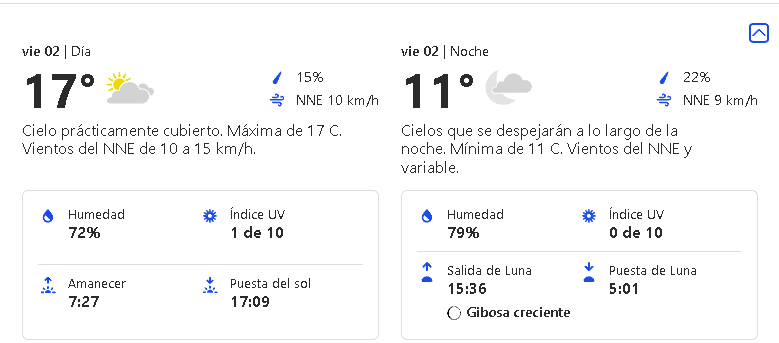


In [ ]:
# Solicitar los valores de las características para la predicción
wind_gust_speed = float(input("Ingrese el valor de WindGustSpeed: "))
humidity_3pm = float(input("Ingrese el valor de Humidity3pm: "))
pressure_9am = float(input("Ingrese el valor de Pressure9am: "))
temp_9am = float(input("Ingrese el valor de Temp9am: "))

# Escalar los datos de prueba
X_test_input = scaler.transform([[wind_gust_speed, humidity_3pm, pressure_9am, temp_9am]])

# Realizar la predicción de probabilidades con el modelo
y_pred_proba = model.predict(X_test_input)

# Obtener la probabilidad de lluvia
probability = y_pred_proba[0][0]

# Imprimir la probabilidad de lluvia
print("Probabilidad de lluvia:", probability)

Ingrese el valor de WindGustSpeed: 9
Ingrese el valor de Humidity3pm: 79
Ingrese el valor de Pressure9am: 1022
Ingrese el valor de Temp9am: 11
1/1 [==============================] - 0s 17ms/step
Probabilidad de lluvia: 0.14775492


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


modelos de regresion: variable continua como 'cantidad de lluvi'

# Hipotesis

En el contexto de nuestro análisis, hemos seleccionado un modelo neuronal como nuestra opción preferida debido a su capacidad de proporcionar resultados precisos y confiables. Los modelos neuronales han demostrado ser altamente efectivos en una variedad de tareas de predicción y clasificación. Además, su capacidad para capturar relaciones complejas y patrones no lineales en los datos los convierte en una opción prometedora para nuestro estudio. Por lo tanto, esperamos que al utilizar un modelo neuronal, podamos obtener predicciones más precisas y confiables, lo que nos permitirá tomar decisiones fundamentadas y obtener mejores resultados en nuestro análisis.